In [1]:
import geopandas
import geopandas as gpd
import pandas as pd
import json
import requests
import numpy as np
from plotly import express as px

from matplotlib import pyplot as plt
import pyproj

from pyproj import CRS
import random
random.seed(10)

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_BAG.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_FITS.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4Image.dll
127: The specified procedure could not be found.

Can't load requested DLL: C:\Program Files\GDAL\gdalplugins\gdal_HDF4Image.dll
127: The specified procedure could not be found.



In [16]:
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json'
municipal_boundaries = gpd.read_file(geodata_url)[['statcode','statnaam','geometry']]

municipal_boundaries['statcode'] = municipal_boundaries['statcode'].apply(lambda x: x[2:].lstrip('0')).astype(int)
municipal_boundaries['value'] = [random.randint(0,1000) for x in range(len(municipal_boundaries))]

municipal_boundaries = municipal_boundaries.rename({'statcode':'Gemeentecode','statnaam':'Gemeentenaam'}, axis=1)
municipal_boundaries = municipal_boundaries.set_index('Gemeentecode')
#### ---------------


#### ------------
municipal_boundaries.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)


municipal_boundaries = municipal_boundaries.iloc[4:6]

print(municipal_boundaries)

fig = px.choropleth(municipal_boundaries, geojson=municipal_boundaries.geometry, locations=municipal_boundaries.index, color="value")
fig.update_geos(fitbounds="locations", visible=False)

fig.show()

             Gemeentenaam                                           geometry  \
Gemeentecode                                                                   
10               Delfzijl  MULTIPOLYGON (((6.99116 53.26585, 6.99701 53.2...   
14              Groningen  MULTIPOLYGON (((6.70885 53.23533, 6.71755 53.2...   

              value  
Gemeentecode         
10              621  
14              555  


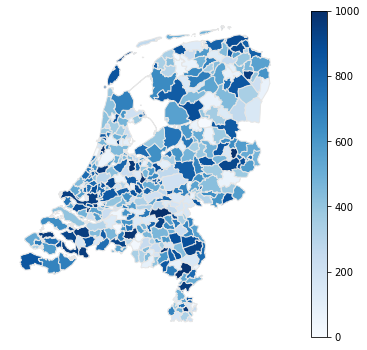

In [10]:
fig, ax = plt.subplots(1, figsize=(10,6))
municipal_boundaries.plot(column='value', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off');